In [1]:
from matplotlib import pyplot  as plt
from sklearn.metrics import accuracy_score
import numpy as np
import seaborn as sns; sns.set()

%matplotlib inline

构造数据集

In [2]:
from sklearn.datasets.samples_generator import make_blobs

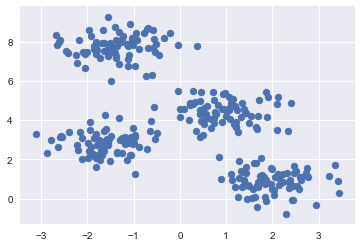

In [4]:
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:, 1], s=50)

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

绘制聚类结果，  画出聚类中心

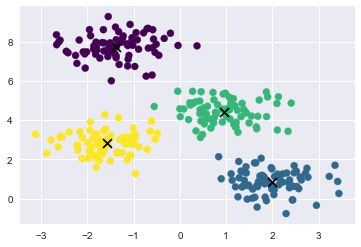

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:, 1], c='black', s=80, marker='x')

核K-means算法，应用于边界非线性的情况

构造数据

In [10]:
from sklearn.datasets import make_moons

In [11]:
X, y = make_moons(200, noise=0.05, random_state=0)

传统kmeans聚类失败的情况

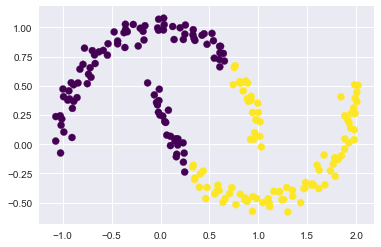

In [12]:
labels = KMeans(n_clusters=2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

应用核方法， 将数据投影到更高纬的空间，

变成线性可分

In [13]:
from sklearn.cluster import SpectralClustering

C:\Users\TG\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


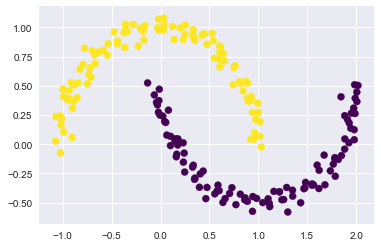

In [14]:
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

# k-means算法处理手写数字

In [15]:
from sklearn.datasets import load_digits

In [16]:
digits = load_digits()
digits.data.shape

(1797, 64)

进行聚类

In [17]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

可以将这些族中心点看做是具有代表性的数字

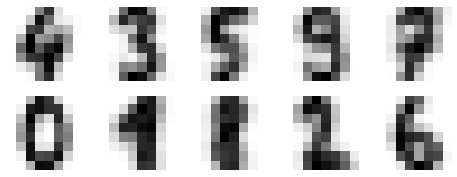

In [18]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

将每个学习到的标签与族标签想匹配

众数匹配

In [19]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    #得到聚类结果第i类的 True Flase 类型的index矩阵
    mask = (clusters ==i)
    #根据index矩阵，找出这些target中的众数，作为真实的label
    labels[mask] = mode(digits.target[mask])[0]

有了真是的指标，可以进行准确度计算

In [24]:
accuracy_score(digits.target, labels)

0.7935447968836951

查看混淆矩阵（可以看出，哪个预测出错了）

主要是出现在8  1

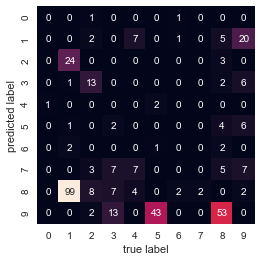

In [34]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
np.fill_diagonal(mat, 0)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');